In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [2]:
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [18]:
crime.copy()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [19]:
crime.columns = ['City', 'Murder', 'Assault', 'Urbanpop', 'Rape']

In [20]:
crime.head()

,City,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
crime.loc[:,'Total'] = crime.sum(numeric_only=True, axis=1)

In [22]:
crime.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [23]:
crime.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


In [24]:
crime.corr()

,Murder,Assault,Urbanpop,Rape,Total
Murder,1.000000,0.801873,0.069573,0.563579,0.787665
Assault,0.801873,1.000000,0.258872,0.665241,0.984315
Urbanpop,0.069573,0.258872,1.000000,0.411341,0.408785
Rape,0.563579,0.665241,0.411341,1.000000,0.744424
Total,0.787665,0.984315,0.408785,0.744424,1.000000


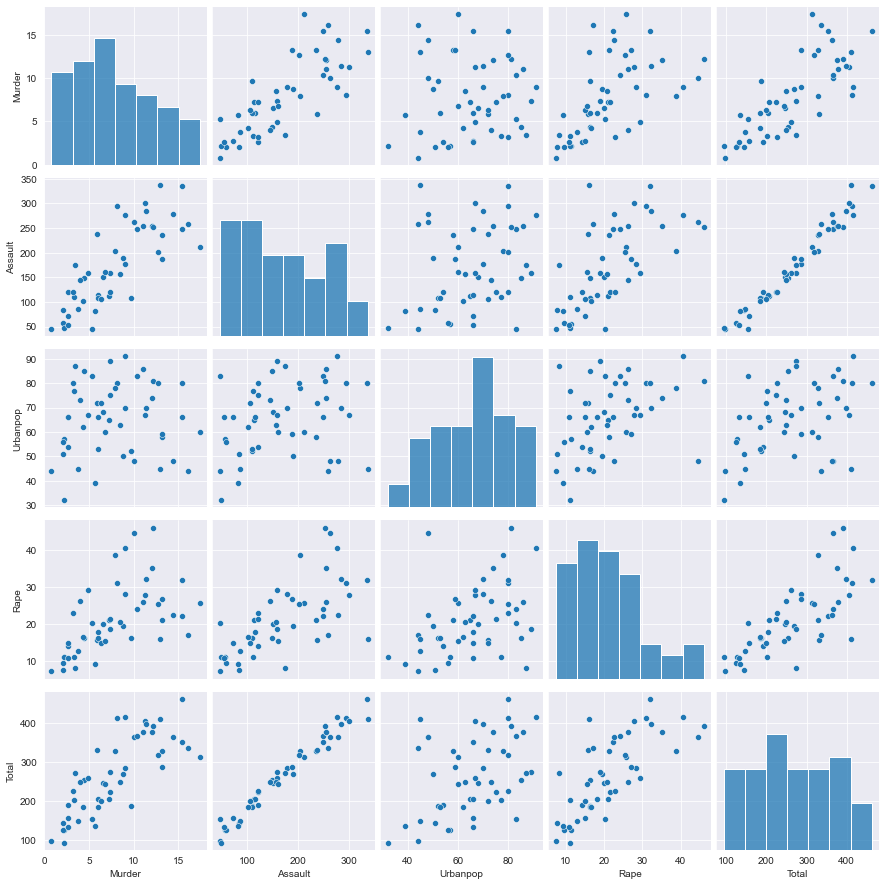

In [25]:
#Visualization
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(crime)

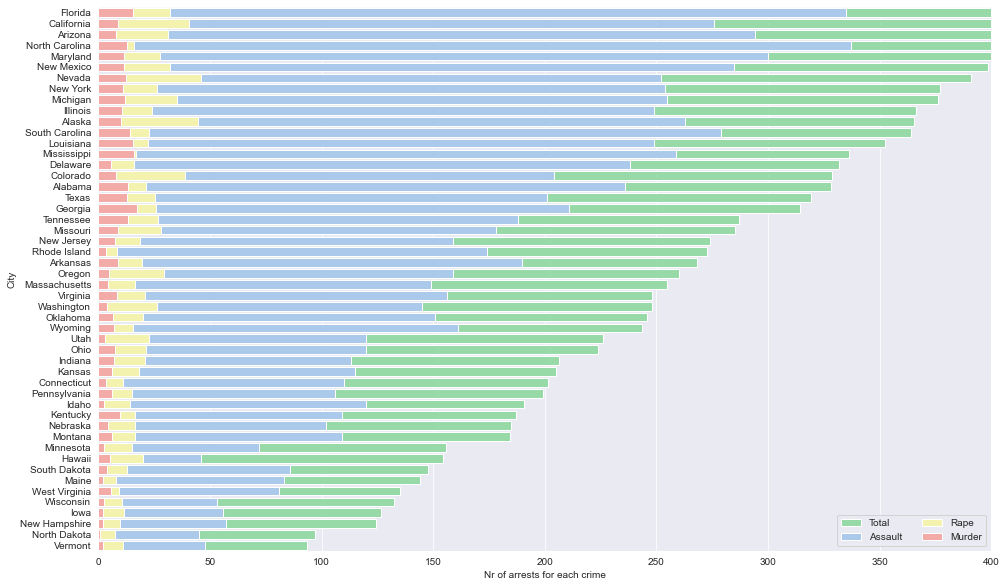

In [26]:
f, ax = plt.subplots(figsize=(16, 10))

stats = crime.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

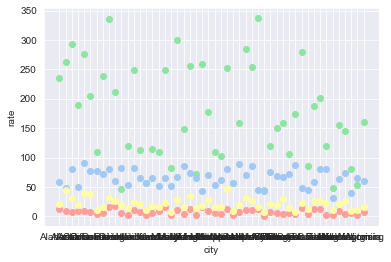

In [27]:
plt.scatter(crime.City, crime.Murder, color='r')
plt.scatter(crime.City, crime.Assault, color='g')
plt.scatter(crime.City, crime.Urbanpop, color='b')
plt.scatter(crime.City, crime.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

# Finding out the optimal number of cluster

In [29]:
X = crime[['Murder','Assault','Rape','Urbanpop']]

In [30]:
crime_norm = preprocessing.scale(X)

In [31]:
crime_norm = pd.DataFrame(crime_norm) # standardize the data to normal dist

In [32]:
crime_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


C:\Users\swami\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


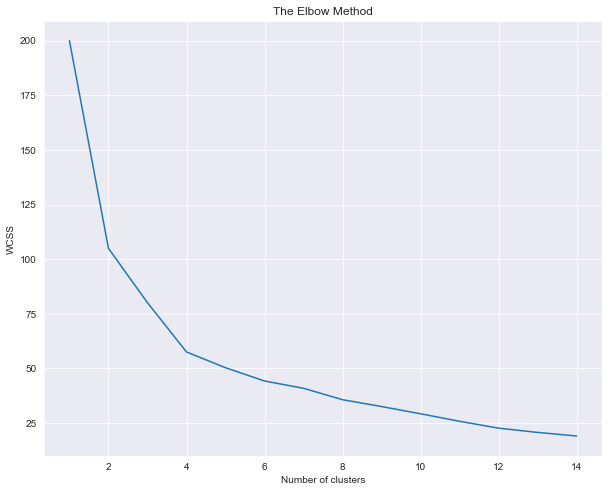

In [33]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# H Clustering Euclidean distance, ward

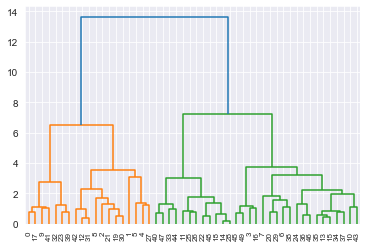

In [34]:
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='ward'))

In [35]:
X = crime_norm.values

In [36]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [37]:
h_cluster = model.fit(X)

In [38]:
labels = model.labels_

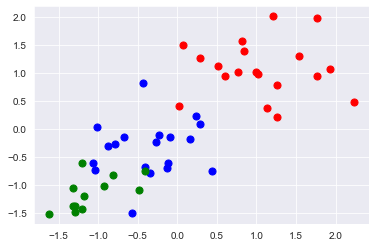

In [39]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')

# K Means

In [40]:
# Analysing the data
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_norm)
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [41]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [42]:
crime['cluster'] = cluster

In [43]:
kmeans_mean_cluster = pd.DataFrame(round(crime.groupby('cluster').mean(),1))
kmeans_mean_cluster                                

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

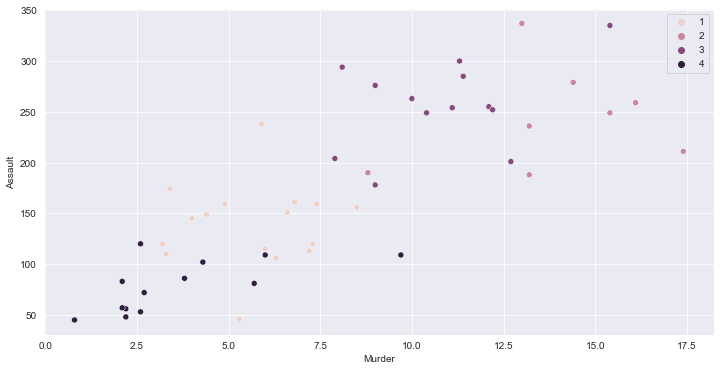

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

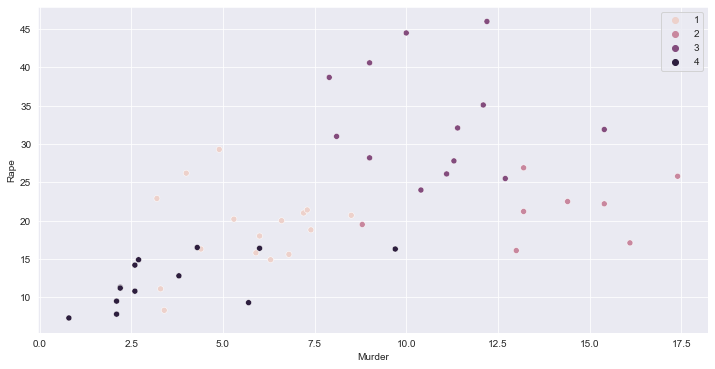

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Murder'], y = crime['Rape'],hue=y_kmeans1)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

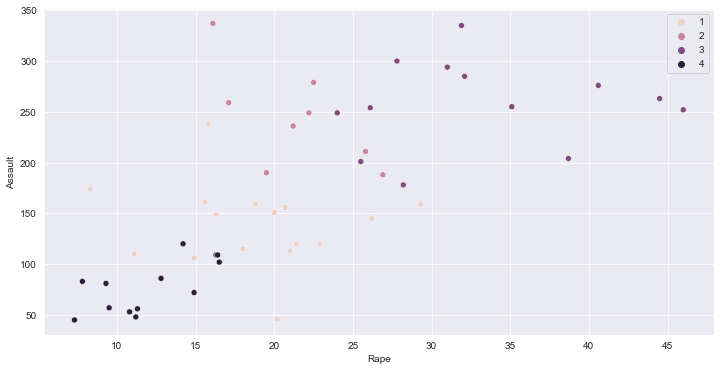

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=crime['Rape'], y = crime['Assault'],hue=y_kmeans1)

In [47]:
stats = crime.sort_values("Total", ascending=True)
crime_total = pd.DataFrame(stats)

In [48]:
crime_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,4
33,North Dakota,0.8,45,44,7.3,97.1,4
28,New Hampshire,2.1,57,56,9.5,124.6,4
14,Iowa,2.2,56,57,11.3,126.5,4
48,Wisconsin,2.6,53,66,10.8,132.4,4


# DBSCAN

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [52]:
array=crime.values

In [54]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [55]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [56]:
cr=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cr

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [57]:
pd.concat([crime,cr],axis=1)

,City,Murder,Assault,Urbanpop,Rape,Total,cluster,cluster
0,Alabama,13.2,236,58,21.2,328.4,2,-1
1,Alaska,10.0,263,48,44.5,365.5,3,-1
2,Arizona,8.1,294,80,31.0,413.1,3,-1
3,Arkansas,8.8,190,50,19.5,268.3,2,-1
4,California,9.0,276,91,40.6,416.6,3,-1
5,Colorado,7.9,204,78,38.7,328.6,3,-1
6,Connecticut,3.3,110,77,11.1,201.4,1,-1
7,Delaware,5.9,238,72,15.8,331.7,1,-1
8,Florida,15.4,335,80,31.9,462.3,3,-1
9,Georgia,17.4,211,60,25.8,314.2,2,-1
